<a href="https://colab.research.google.com/github/iolopezm/Analitica-de-Negocios/blob/main/Reto_3_IOLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors  import KNeighborsClassifier
from sklearn.cluster import KMeans

1. Se cargan los archivos

Esta es la matriz de correlacion: 
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000
[[   26 18000    14]
 [   43 13000     9]
 [   55 42000    16]
 ...
 [   55 70000    17]
 [   68 64000    15]
 [   48 67000    18]]
[1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0

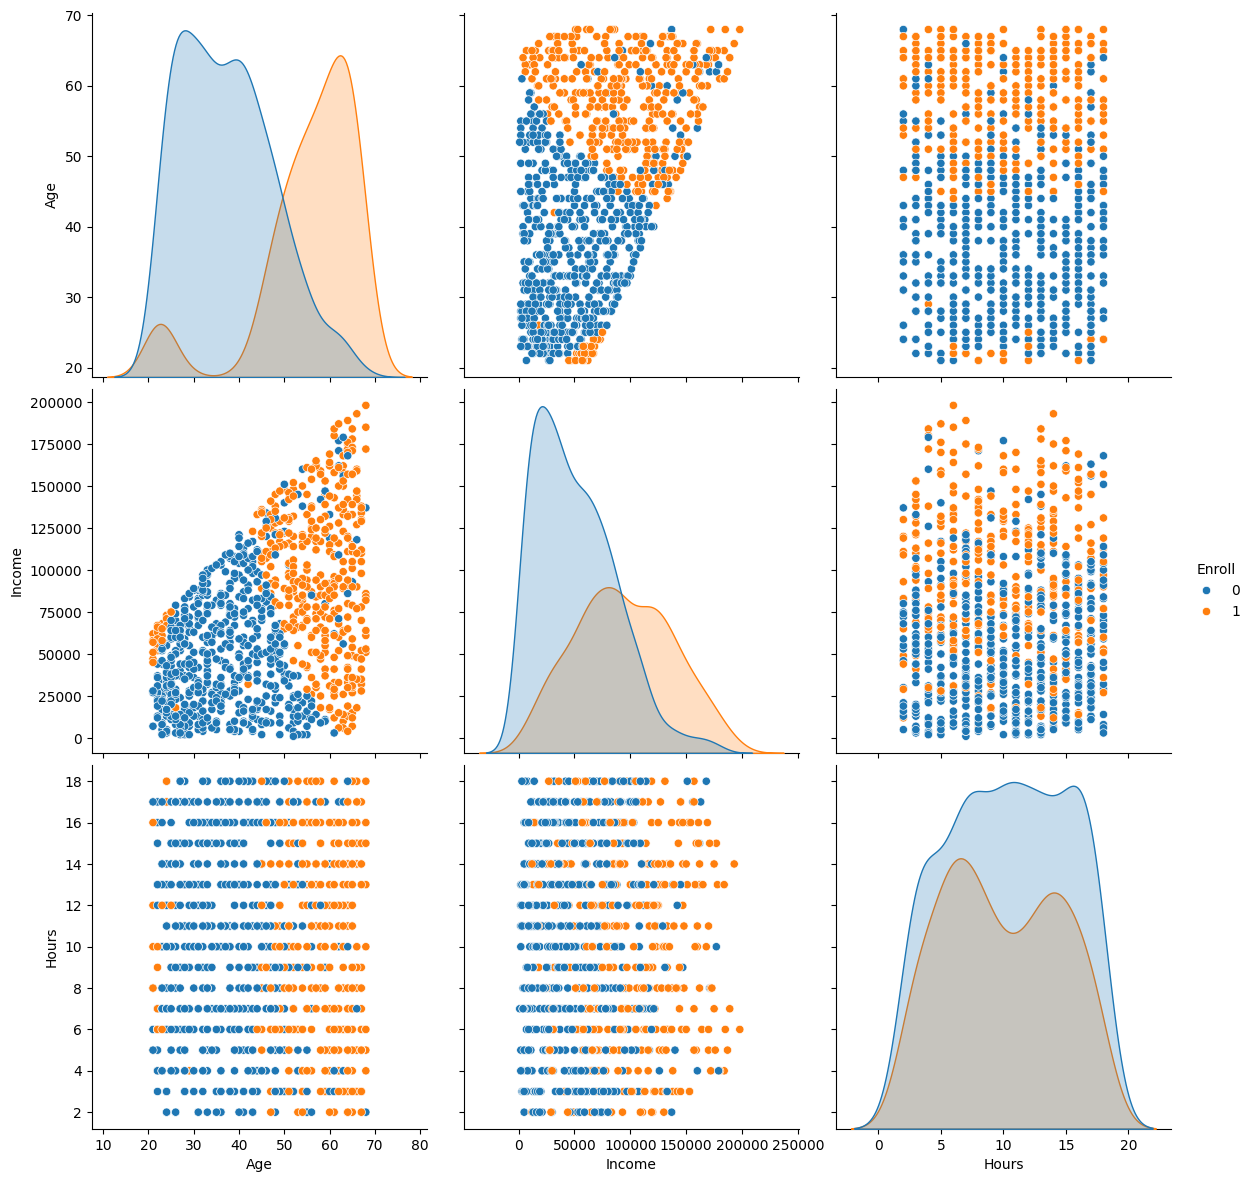

In [ ]:
nxl='/content/sample_data/3 BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

XDB=XDB[['Age','Income','Hours','Enroll']]

sns.pairplot(XDB,hue='Enroll',height=4,vars=['Age','Income','Hours'])

#Confirmar la bunea correlacion
corr=XDB.corr()
print('Esta es la matriz de correlacion: \n',corr)

#Configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:, 0:3]) #Variables de entrada
yd=np.array(XDB.iloc[:,3])#Variable de salida Enroll
print (XD)
print (yd)

2. Matriz de correlación

<Axes: >

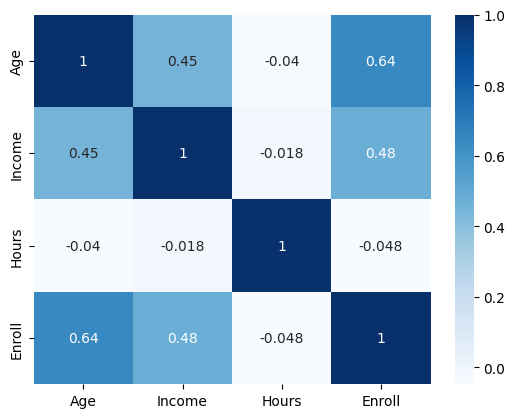

In [ ]:
sns.heatmap(corr,annot=True, cmap='Blues')

3. Matriz de correlación

Esta es la matriz de confusion:
 [[538  59]
 [145 258]]
Exactitud: 0.796
Sensibilidad: 0.6401985111662531
Especificidad: 0.9011725293132329
El modelo me ingresa al gym: [0]


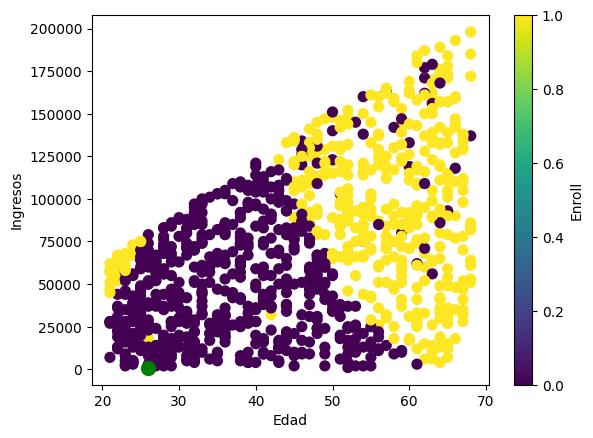

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #10 vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print('Esta es la matriz de confusion:\n',cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print('Exactitud:',Exac)
print('Sensibilidad:',Sen)
print('Especificidad:',Spec)

#Model me vas prestar o no
XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print ('El modelo me ingresa al gym:',ydpp)

#Gráfico de dispersión
scatter = plt.scatter(XD[:,0], XD[:,1], c=yd, s=50, cmap='viridis')
plt.scatter(XDP[:,0], XDP[:,1], marker='o', s=100, facecolors='green')

#Etiquetas de los ejes
plt.xlabel('Edad')
plt.ylabel('Ingresos')

#Barra de color
colorbar = plt.colorbar(scatter, label = 'Enroll')
plt.show()

4. Construcción K means

Donde quedo el primer solicitante: 3
Donde quedo el segundo solicitante: 3
Donde quedo el tercer solicitante: 1
--------------------------------------------------------------------
El modelo me ingresa al gym: [3]
--------------------------------------------------------------------
El porcentaje de negados para el cluster 0 es: 0.5284552845528455
El porcentaje de aprobados para el cluster 0 es: 0.4715447154471545
--------------------------------------------------------------------
El porcentaje de negados para el cluster 1 es: 0.7226890756302521
El porcentaje de aprobados para el cluster 1 es: 0.2773109243697479
--------------------------------------------------------------------
El porcentaje de negados para el cluster 2 es: 0.3184713375796178
El porcentaje de aprobados para el cluster 2 es: 0.6815286624203821
--------------------------------------------------------------------
El porcentaje de negados para el cluster 3 es: 0.8487084870848709
El porcentaje de aprobados para el cluster

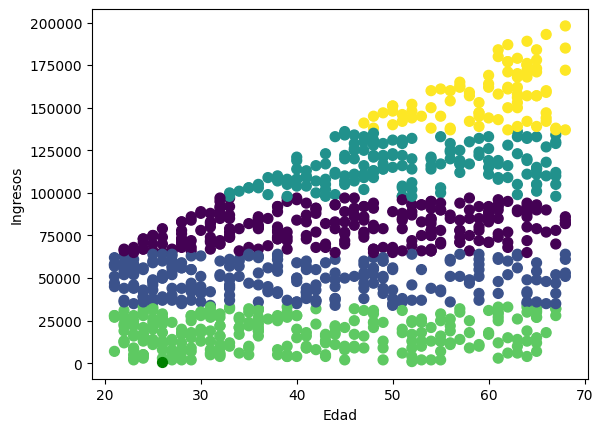

In [ ]:
np.random.seed(42)

#modelo de KMeans
mkm = KMeans(n_clusters=5, init='random', n_init= 10, random_state=42)
mkm.fit(XD)  # Solo usas XD para entrenar

labels = mkm.labels_  # Donde quedaron clasificados los datos
print('Donde quedo el primer solicitante:', labels[0])
print('Donde quedo el segundo solicitante:', labels[1])
print('Donde quedo el tercer solicitante:', labels[2])
print('--------------------------------------------------------------------')


# Graficar clusters
plt.scatter(XD[:, 0], XD[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(XDP[:, 0], XDP[:, 1], marker='o', s=50, facecolors='green')
plt.xlabel('Edad')
plt.ylabel('Ingresos')

# Predecir nuevo punto
XDP = np.array([[26, 800, 15]])
ydpp2 = mkm.predict(XDP)
print('El modelo me ingresa al gym:', ydpp2)
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 0
c00 = len(np.where((labels == 0) & (yd == 0))[0])
c01 = len(np.where((labels == 0) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 0 es:', c00 / (c00 + c01))
print('El porcentaje de aprobados para el cluster 0 es:', c01 / (c00 + c01))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 1
c10 = len(np.where((labels == 1) & (yd == 0))[0])
c11 = len(np.where((labels == 1) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 1 es:', c10 / (c10 + c11))
print('El porcentaje de aprobados para el cluster 1 es:', c11 / (c10 + c11))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 2
c20 = len(np.where((labels == 2) & (yd == 0))[0])
c21 = len(np.where((labels == 2) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 2 es:', c20 / (c20 + c21))
print('El porcentaje de aprobados para el cluster 2 es:', c21 / (c20 + c21))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 3
c30 = len(np.where((labels == 3) & (yd == 0))[0])
c31 = len(np.where((labels == 3) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 3 es:', c30 / (c30 + c31))
print('El porcentaje de aprobados para el cluster 3 es:', c31 / (c30 + c31))
print('--------------------------------------------------------------------')

# Porcentajes en el cluster 4
c40 = len(np.where((labels == 4) & (yd == 0))[0])
c41 = len(np.where((labels == 4) & (yd == 1))[0])
print('El porcentaje de negados para el cluster 4 es:', c40 / (c40 + c41))
print('El porcentaje de aprobados para el cluster 4 es:', c41 / (c40 + c41))
print('--------------------------------------------------------------------')

# Características de cada cluster
clusters = mkm.cluster_centers_
print('Las características de cada cluster son:\n', clusters)

In [ ]:
# Número de individuos totales por cluster
print(f"Cluster 0: {len(np.where(mkm.labels_ == 0)[0])} individuos")
print(f"Cluster 1: {len(np.where(mkm.labels_ == 1)[0])} individuos")
print(f"Cluster 2: {len(np.where(mkm.labels_ == 2)[0])} individuos")
print(f"Cluster 3: {len(np.where(mkm.labels_ == 3)[0])} individuos")
print(f"Cluster 4: {len(np.where(mkm.labels_ == 4)[0])} individuos")

Cluster 0: 246 individuos
Cluster 1: 238 individuos
Cluster 2: 157 individuos
Cluster 3: 271 individuos
Cluster 4: 88 individuos


In [ ]:
# Número de individuos que SI van al gym por cluster
print(f"Cluster 0: {len(np.where((mkm.labels_ == 0) & (yd == 1))[0])} individuos")
print(f"Cluster 1: {len(np.where((mkm.labels_ == 1) & (yd == 1))[0])} individuos")
print(f"Cluster 2: {len(np.where((mkm.labels_ == 2) & (yd == 1))[0])} individuos")
print(f"Cluster 3: {len(np.where((mkm.labels_ == 3) & (yd == 1))[0])} individuos")
print(f"Cluster 4: {len(np.where((mkm.labels_ == 4) & (yd == 1))[0])} individuos")

Cluster 0: 116 individuos
Cluster 1: 66 individuos
Cluster 2: 107 individuos
Cluster 3: 41 individuos
Cluster 4: 73 individuos


In [ ]:
# Para el cluster 0
print(f'Edad media del cluster 0: {XD[mkm.labels_ == 0][: , 0].mean()}')
print(f'Ingreso medio del cluster 0: {XD[mkm.labels_ == 0][: , 1].mean()}')
print(f'Horas promedio del cluster 0: {XD[mkm.labels_ == 0][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 1
print(f'Edad media del cluster 1: {XD[mkm.labels_ == 1][: , 0].mean()}')
print(f'Ingreso medio del cluster 1: {XD[mkm.labels_ == 1][: , 1].mean()}')
print(f'Horas promedio del cluster 1: {XD[mkm.labels_ == 1][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 2
print(f'Edad media del cluster 2: {XD[mkm.labels_ == 2][: , 0].mean()}')
print(f'Ingreso medio del cluster 2: {XD[mkm.labels_ == 2][: , 1].mean()}')
print(f'Horas promedio del cluster 2: {XD[mkm.labels_ == 2][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 3
print(f'Edad media del cluster 3: {XD[mkm.labels_ == 3][: , 0].mean()}')
print(f'Ingreso medio del cluster 3: {XD[mkm.labels_ == 3][: , 1].mean()}')
print(f'Horas promedio del cluster 3: {XD[mkm.labels_ == 3][: , 2].mean()}')
print('--------------------------------------------------------------------')

# Para el cluster 4
print(f'Edad media del cluster 4: {XD[mkm.labels_ == 4][: , 0].mean()}')
print(f'Ingreso medio del cluster 4: {XD[mkm.labels_ == 4][: , 1].mean()}')
print(f'Horas promedio del cluster 4: {XD[mkm.labels_ == 4][: , 2].mean()}')
print('--------------------------------------------------------------------')

Edad media del cluster 0: 44.857723577235774
Ingreso medio del cluster 0: 80146.34146341463
Horas promedio del cluster 0: 10.333333333333334
--------------------------------------------------------------------
Edad media del cluster 1: 39.747899159663866
Ingreso medio del cluster 1: 49365.5462184874
Horas promedio del cluster 1: 10.281512605042018
--------------------------------------------------------------------
Edad media del cluster 2: 51.261146496815286
Ingreso medio del cluster 2: 115770.70063694268
Horas promedio del cluster 2: 9.80891719745223
--------------------------------------------------------------------
Edad media del cluster 3: 39.690036900369
Ingreso medio del cluster 3: 17760.147601476016
Horas promedio del cluster 3: 10.188191881918819
--------------------------------------------------------------------
Edad media del cluster 4: 60.03409090909091
Ingreso medio del cluster 4: 157795.45454545456
Horas promedio del cluster 4: 10.136363636363637
-----------------------

# **Análisis de resultados**

De acuerdo con nuestro análisis de datos, la edad y el nivel de ingresos son las variables que más explican la probabilidad de inscripción en un gimnasio, siendo la edad la primera, es decir que las personas de mayor edad y con ingresos más altos tienen una mayor tendencia a inscribirse. Nuestros modelos predictivos, KNN y K-Means, han logrado una precisión aceptable (exactitud cercana al 80%, con una sensibilidad del 64%), siendo especialmente buenos para identificar a aquellos que no se inscriben (especificidad del 90%). Al aplicar estos modelos a un caso específico, ambos modelos concluyen que un individuo de 26 años con ingresos de $800 anuales y 15 horas semanales de ejercicio presenta un bajo perfil de inscripción.

# **Preguntas Word**

**1. Describir en el análisis de resultados cada una de las variables que hacen parte de la base de datos.**

Variables

Age: edad de las personas registradas en la base de datos. De tipo entero.

Income: ingresos registrados de cada persona en la base de datos. de tipo entero.

Hours: horas estimadas de ejercicio en el gimnasio de cada persona. De tipo entero.

Enroll: variable dependiente o a predecir, puede tomar el valor de 1 si la persona se inscribe al gimnadio o de 0 en caso de que no lo haga.

**2. Determinar la variable que mejor lleva a cabo el proceso de caracterización de la inscripción de una persona al Gym.**

La variable que tenga mayor correlación con la variable dependiente 'Enroll' sera la que mejor la describe, en este caso, la variable independiente 'Age', que es la que mejor lo demuestra con un valor de correlacion 0.64.


**3. Según las variables de entrada y de salida, determinar cuáles variables tienen una mayor correlación entre ellas.**

Las variables con mas correlacion entre ellas son (de mayor a menor):

1. Enroll - Age: 0.64
2. Enroll - Income: 0.48
3. Income - Age: 0.45
4. Hours - Income: -0.018
5. Hours - Age: -0.04
6. Enroll - Hours: -0.048

**4. Determinar el comportamiento del modelo KNN en el pronóstico de los datos utilizados para la configuración del modelo en cuanto a exactitud, sensibilidad y especificidad.**

Exactitud: 0.796
Sensibilidad: 0.6401985111662531
Especificidad: 0.9011725293132329

**5. Determinar si una persona con las siguientes características va a comprar la membresía al Gym utilizando el modelo KNN y K-Means.**
["𝐴𝑔𝑒","𝐼𝑛𝑐𝑜𝑚𝑒","𝐻𝑜𝑢𝑟𝑠","𝐸𝑛𝑟𝑜𝑙𝑙"]=[(26,800,15)]

El modelo KNN predice que no va a entrar al gimnasio, es decir, 'Enroll = 0'. Para el modelo de K-Means el modelo lo clasifica en el cluster 4.

**6. De acuerdo con el individuo anterior, llevar a cabo su ubicación en la gráfica del modelo KNN y del modelo KMeans teniendo en cuenta para ello las variables que poseen la mayor correlación entre ellas.**

De acuerdo con el modelo KNN, la persona con las caracteristicas determinadas se ubica en el punto verde

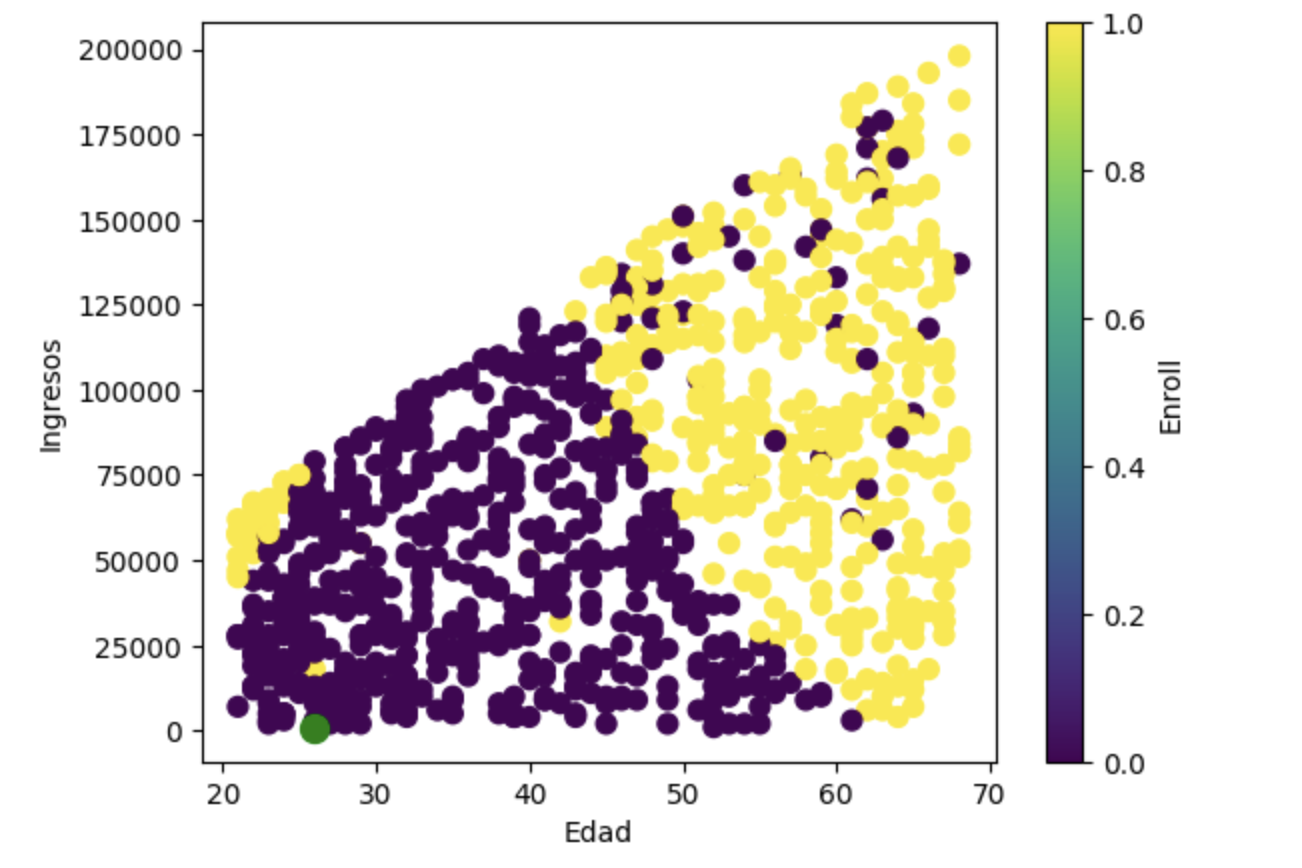

De acuerdo con el modelo K-Means, la persona con las caracteristicas determinadas se ubica en el punto verde oscuro

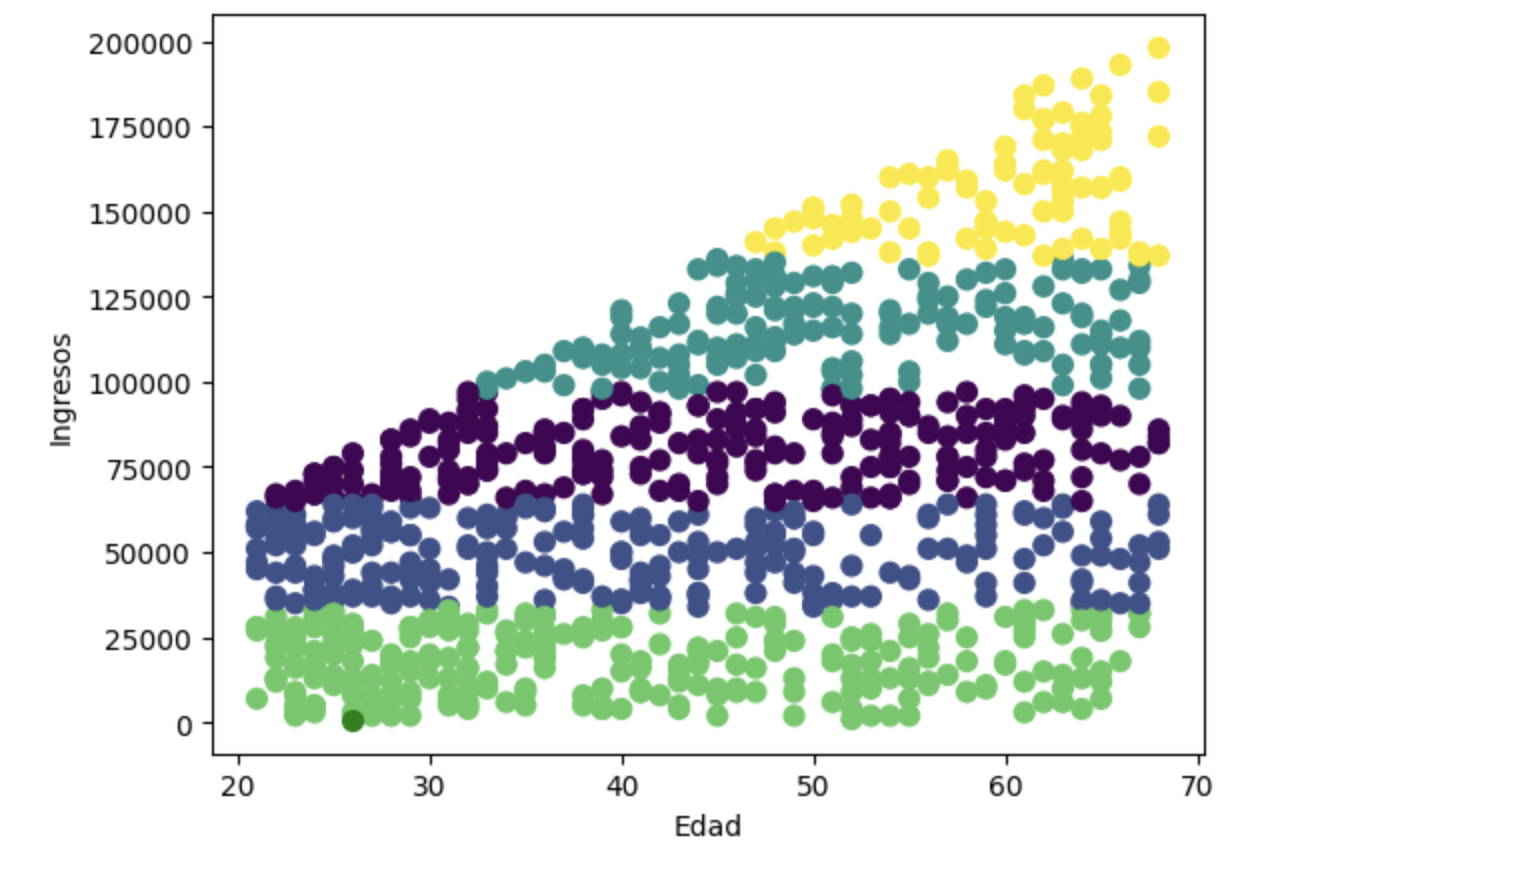

**7. Determinar el comportamiento del modelo K-Means frente al pronóstico de los datos utilizados para la configuración.**

La clasificación de la persona se hace en el cluster 4.

**8. Determinar el número de individuos que harán parte de la membresía de acuerdo con cada uno de los clusters, indicando cual es el cluster que presenta la mayor edad, los mayores ingresos y estarán en el gimnasio por un mayor número de horas.**

Cluster 0: 116 individuos

Cluster 1: 66 individuos

Cluster 2: 107 individuos

Cluster 3: 41 individuos

Cluster 4: 73 individuos

------

Cluster con mayor edad promedio: Cluster 5

Cluster con mayor ingreso promedio: Cluster 5

Cluster con mayor horas promedio: Cluster 1